Geopolitical Tail Risk Model
Non-Stationary POT EVT Framework - Complete Implementation
Initializing model...
GPR stabilization: original range [-0.8475, 4.9840]
 standardized range [-0.5449, 13.5791]
Data loaded: 3054 observations, period: 2005-01-05 00:00:00 to 2018-09-27 00:00:00
Analyzing indices: 89 indices
GPR proxy: GPRD
GPR data numerically stabilized

Running complete analysis...
Multi-Index Geopolitical Tail Risk Analysis
Non-Stationary POT EVT Framework

==================== Analyzing I1JOR001 ====================
Stage 1: Threshold selection
Selected threshold u=0.0069, Nu=456, initial xi_hat=0.7120
Stage 2: Parameter estimation
GPD parameters: sigma0=-4.9842, sigma1=-0.0713, xi0=0.3560, xi1=0.0609
Log-likelihood: 1654.4410, Uncond LL: 1653.5664, LR p-value: 0.4171
AIC full: -3300.8819, AIC uncond: -3303.1329

==================== Analyzing I1NGA001 ====================
Stage 1: Threshold selection
Selected threshold u=0.0093, Nu=412, initial xi_hat=0.5527
Stage 2: Paramete

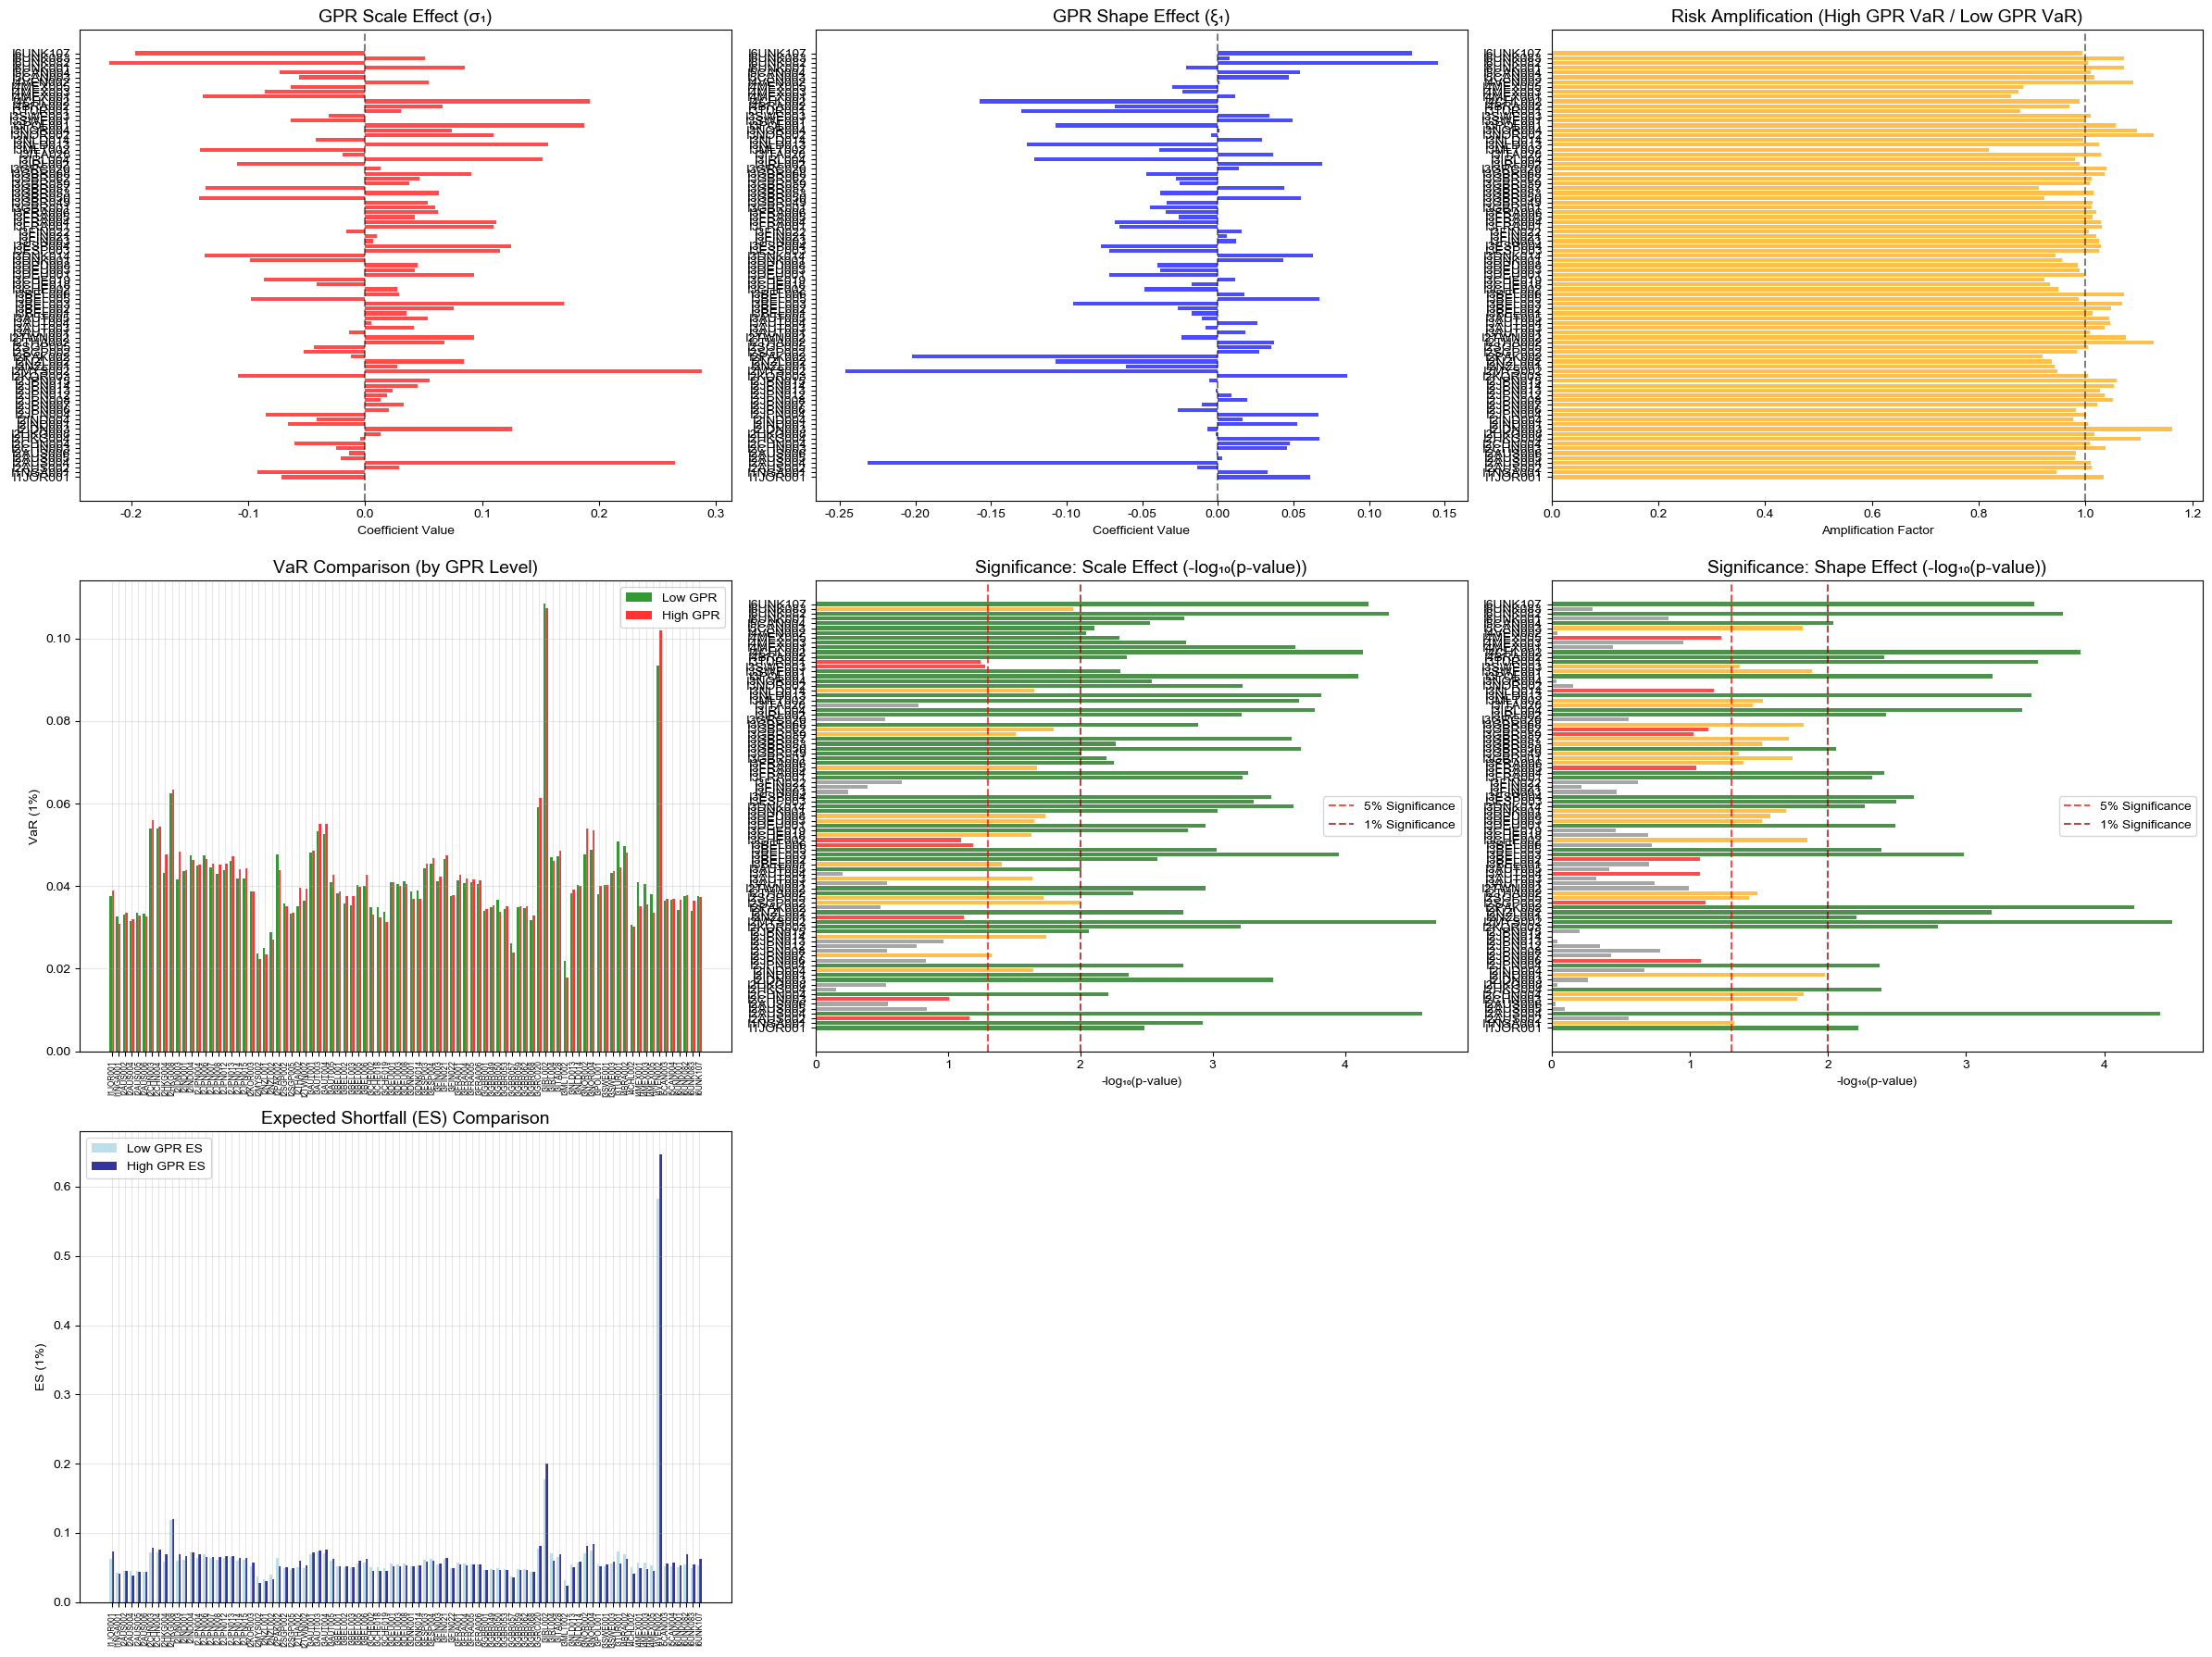

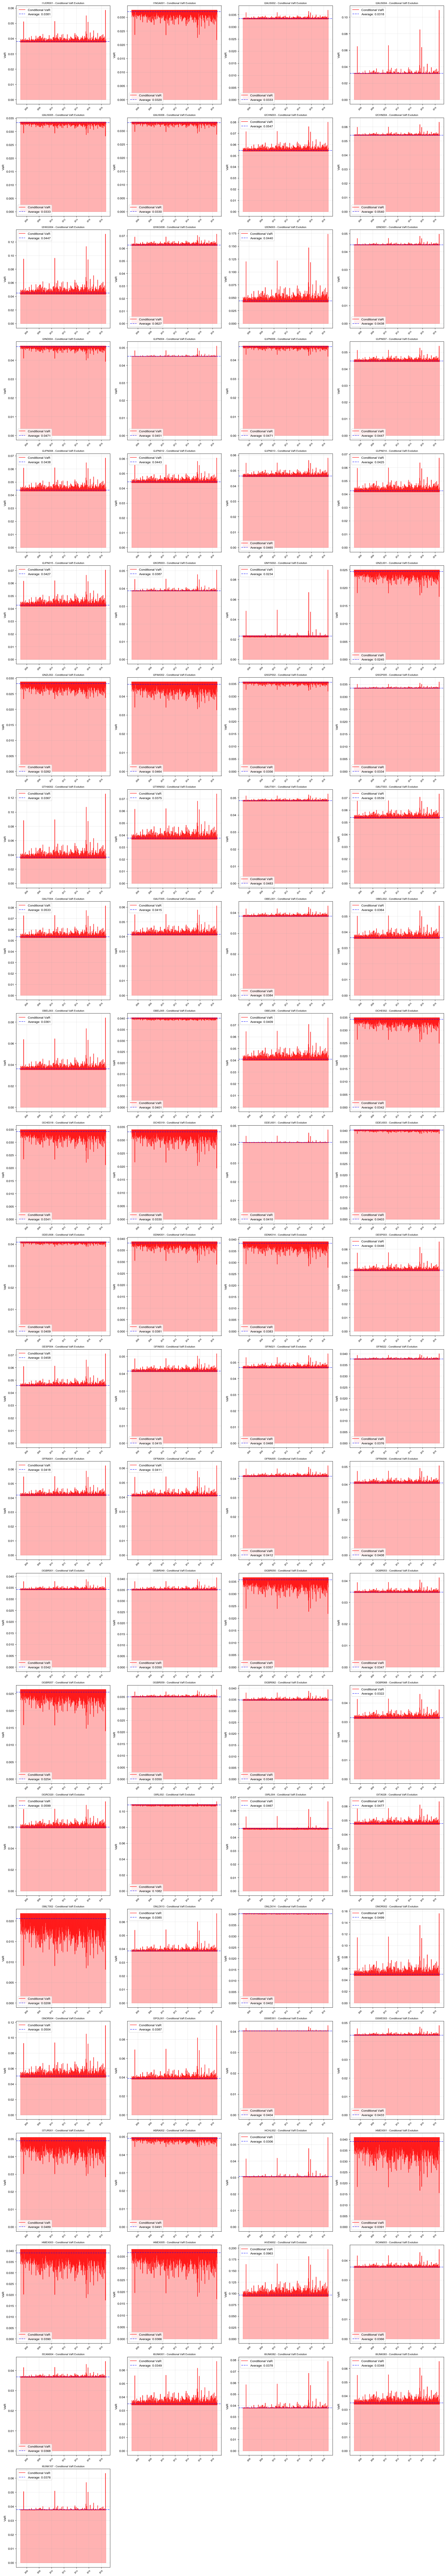

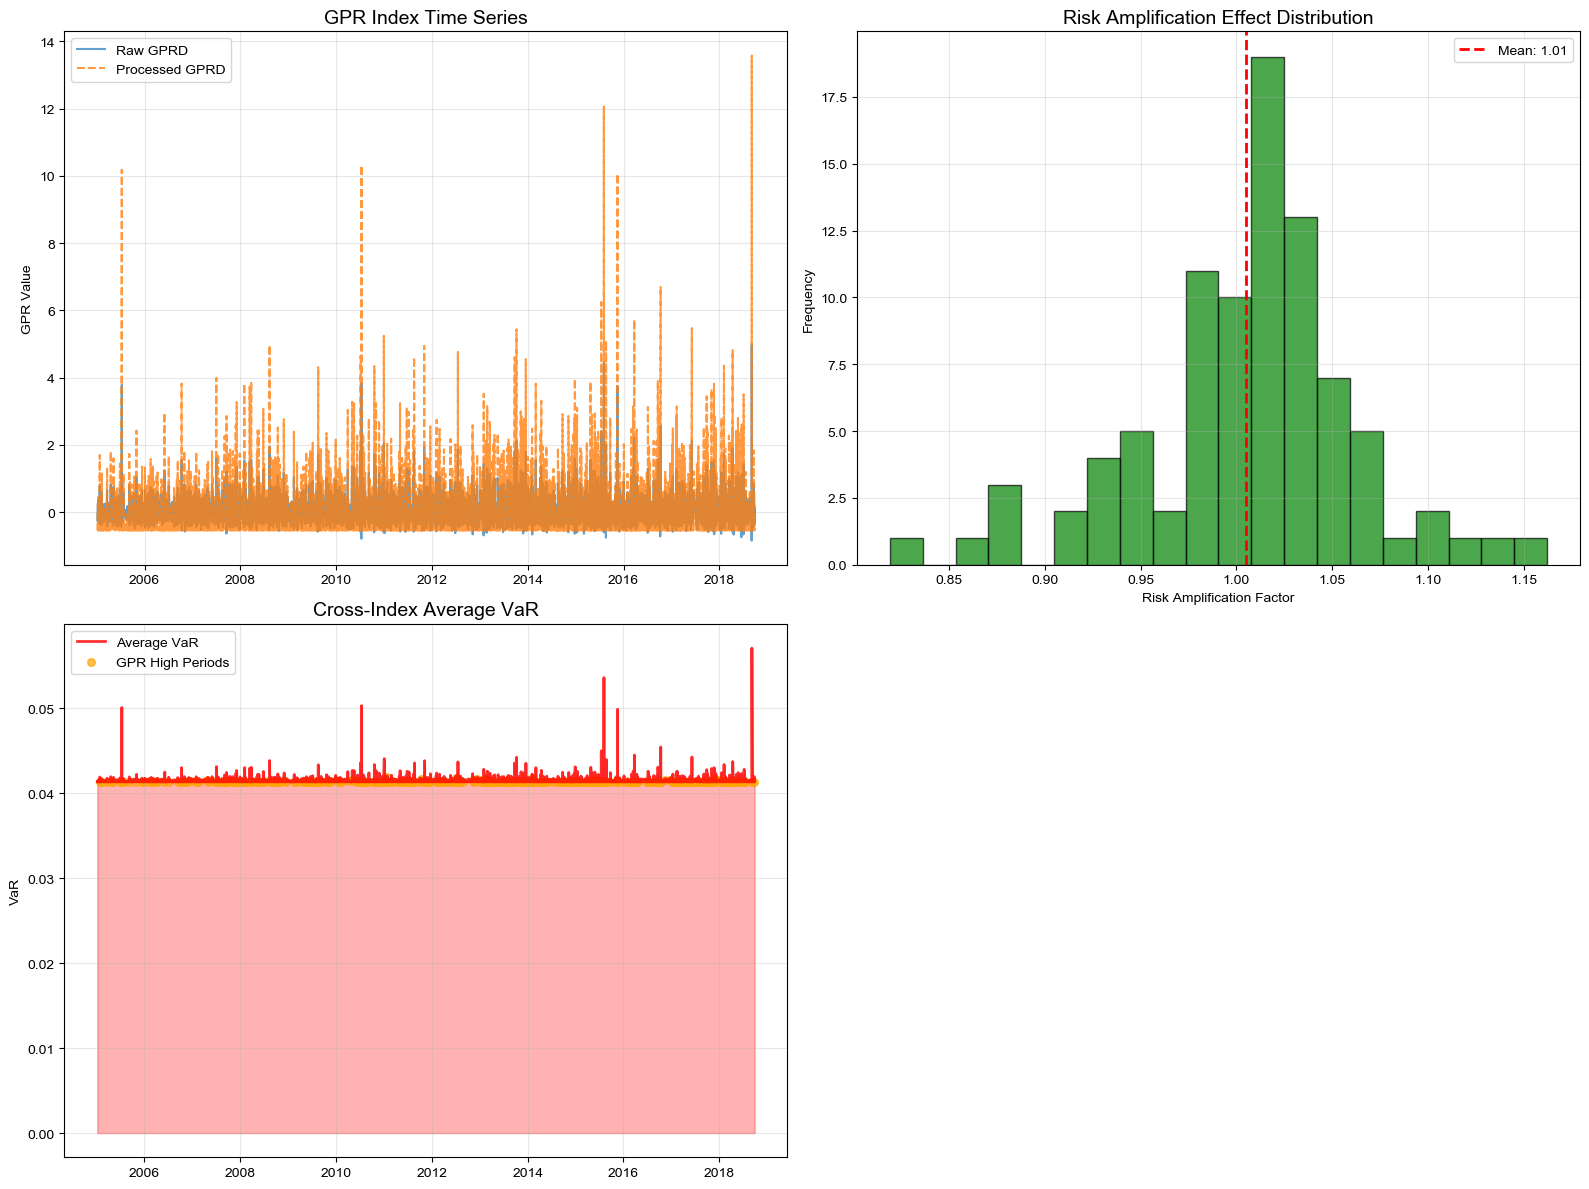


Generating comprehensive report...

Geopolitical Tail Risk Model - Comprehensive Analysis Report
Non-Stationary POT EVT Framework Complete Results

1. Dataset Overview:
 • Total observations: 3054
 • Time period: 2005-01-05 00:00:00 to 2018-09-27 00:00:00
 • Analyzed indices: 89
 • GPRD raw range: -0.85 to 4.98
 • GPRD processed range: -0.54 to 13.58

2. Core Hypotheses Validation:
 • Hypothesis 1 (σ₁ > 0): 53/89 indices satisfied
 • Hypothesis 2 (ξ₁ > 0): 42/89 indices satisfied

3. GPR Scale Effect Ranking (σ₁ coefficient):
 1. I2MYS002: σ₁ = 0.2876*** (p = 0.0000)
 2. I2AUS004: σ₁ = 0.2648*** (p = 0.0000)
 3. I4CHL002: σ₁ = 0.1918*** (p = 0.0001)
 4. I3POL001: σ₁ = 0.1872*** (p = 0.0001)
 5. I3BEL003: σ₁ = 0.1702*** (p = 0.0001)

4. Risk Amplification Effect Analysis:
 1. I2IDN003: 1.16x amplification
 Low GPR VaR: 0.0417, High GPR VaR: 0.0484
 2. I2THA002: 1.13x amplification
 Low GPR VaR: 0.0351, High GPR VaR: 0.0396
 3. I3NOR002: 1.13x amplification
 Low GPR VaR: 0.0478, High GP

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, optimize
import warnings
warnings.filterwarnings('ignore')
class MultiIndexGeopoliticalTailRiskModel:
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.gpr_column = 'GPRD'
        self.return_columns = ['I1JOR001', 'I1NGA001', 'I2AUS002', 'I2AUS004', 'I2AUS005', 'I2AUS006', 'I2CHN003', 'I2CHN004', 'I2HKG004', 'I2HKG008', 'I2IDN003', 'I2IND001', 'I2IND004', 'I2JPN004', 'I2JPN006', 'I2JPN007', 'I2JPN008', 'I2JPN012', 'I2JPN013', 'I2JPN014', 'I2JPN015', 'I2KOR003', 'I2MYS002', 'I2NZL001', 'I2NZL002', 'I2PAK002', 'I2SGP002', 'I2SGP005', 'I2THA002', 'I2TWN002', 'I3AUT001', 'I3AUT003', 'I3AUT004', 'I3AUT005', 'I3BEL001', 'I3BEL002', 'I3BEL003', 'I3BEL005', 'I3BEL006', 'I3CHE002', 'I3CHE018', 'I3CHE019', 'I3DEU001', 'I3DEU003', 'I3DEU008', 'I3DNK001', 'I3DNK014', 'I3ESP003', 'I3ESP004', 'I3FIN003', 'I3FIN021', 'I3FIN022', 'I3FRA001', 'I3FRA004', 'I3FRA005', 'I3FRA006', 'I3GBR001', 'I3GBR049', 'I3GBR050', 'I3GBR053', 'I3GBR057', 'I3GBR059', 'I3GBR062', 'I3GBR068', 'I3GRC020', 'I3IRL002', 'I3IRL004', 'I3ITA028', 'I3MLT002', 'I3NLD013', 'I3NLD014', 'I3NOR002', 'I3NOR004', 'I3POL001', 'I3SWE001', 'I3SWE003', 'I3TUR001', 'I4BRA002', 'I4CHL002', 'I4MEX001', 'I4MEX003', 'I4MEX005', 'I4VEN002', 'I5CAN003', 'I5CAN004', 'I6UNK001', 'I6UNK082', 'I6UNK083', 'I6UNK107']
        self.data[[self.gpr_column] + self.return_columns] = self.data[[self.gpr_column] + self.return_columns].apply(pd.to_numeric, errors='coerce')
        self.data['date'] = pd.to_datetime(self.data['Date'])
        self.gpr_raw = self.data[self.gpr_column].values
        self.gpr_processed = self.numerical_stabilization_gpr(self.gpr_raw)
        self.T = len(self.data)
        self.results = {}
        print(f"Data loaded: {self.T} observations, period: {self.data['date'].min()} to {self.data['date'].max()}")
        print(f"Analyzing indices: {len(self.return_columns)} indices")
        print(f"GPR proxy: {self.gpr_column}")
        print(f"GPR data numerically stabilized")
    def numerical_stabilization_gpr(self, gpr_data):
        gpr_positive = np.maximum(gpr_data, 1e-6)
        gpr_mean, gpr_std = np.mean(gpr_positive), np.std(gpr_positive)
        gpr_standardized = (gpr_positive - gpr_mean) / gpr_std
        print(f"GPR stabilization: original range [{gpr_data.min():.4f}, {gpr_data.max():.4f}]")
        print(f" standardized range [{gpr_standardized.min():.4f}, {gpr_standardized.max():.4f}]")
        return gpr_standardized
    def analyze_single_index(self, index_name):
        print(f"\n{'='*20} Analyzing {index_name} {'='*20}")
        returns = self.data[index_name].values
        dates = self.data['date'].values
        gpr_cov = self.gpr_processed[:-1]
        losses = -returns[1:]
        dates = dates[1:]
        T = len(losses)
        u, xi_hat_initial, Nu = self.stage1_threshold_selection(losses, T)
        params_stage2, ll, ll_uncond, lr_stat, p_lr, aic_full, aic_uncond = self.stage2_estimation(losses, gpr_cov, u, Nu)
        risk_measures = self.calculate_risk_measures(params_stage2, u, Nu, T, gpr_cov)
        hypothesis_tests = self.hypothesis_tests(params_stage2)
        self.results[index_name] = {
            'stage1': {'u': u, 'Nu': Nu, 'xi_hat_initial': xi_hat_initial},
            'stage2': params_stage2,
            'll': ll, 'll_uncond': ll_uncond, 'lr_p': p_lr, 'aic_full': aic_full, 'aic_uncond': aic_uncond,
            'risk_measures': risk_measures, 'hypothesis_tests': hypothesis_tests, 'losses': losses, 'gpr_cov': gpr_cov, 'dates': dates
        }
        return self.results[index_name]
    def hill_estimator(self, data_sorted_desc, k):
        if k < 2:
            return 0.0
        logs = np.log(data_sorted_desc[:k] / data_sorted_desc[k - 1])
        return np.mean(logs)
    def stage1_threshold_selection(self, losses, T):
        print("Stage 1: Threshold selection")
        losses_sorted = np.sort(losses)[::-1]
        k_min = max(10, int(T * 0.02))
        k_max = min(int(T * 0.15), T - 1)
        k_values = np.unique(np.linspace(k_min, k_max, 10, dtype=int))
        mse_list = []
        xi_hats = []
        for k in k_values:
            xi_hat = self.hill_estimator(losses_sorted, k)
            xi_hats.append(xi_hat)
            B = 100
            xi_b = []
            for _ in range(B):
                resample = np.random.choice(losses, T, replace=True)
                res_sorted = np.sort(resample)[::-1]
                xi_b.append(self.hill_estimator(res_sorted, k))
            xi_b = np.array(xi_b)
            bias = np.mean(xi_b) - xi_hat
            var = np.var(xi_b)
            mse = bias**2 + var
            mse_list.append(mse)
        opt_idx = np.argmin(mse_list)
        k_opt = k_values[opt_idx]
        xi_hat = xi_hats[opt_idx]
        u = losses_sorted[k_opt - 1]
        if xi_hat < 0 or k_opt < 30:
            u = np.percentile(losses, 90)
            k_opt = int(T * 0.1)
            xi_hat = self.hill_estimator(np.sort(losses)[::-1], k_opt)
        Nu = np.sum(losses > u)
        print(f"Selected threshold u={u:.4f}, Nu={Nu}, initial xi_hat={xi_hat:.4f}")
        return u, xi_hat, Nu
    def stage2_estimation(self, losses, gpr_cov, u, Nu):
        print("Stage 2: Parameter estimation")
        idx_exc = losses > u
        excesses = losses[idx_exc] - u
        cov_exc = gpr_cov[idx_exc]
        if len(excesses) < 10:
            print("Insufficient exceedances, using defaults")
            return {'sigma0': 0.0, 'sigma1': 0.0, 'xi0': 0.1, 'xi1': 0.0}, -np.inf, -np.inf, 0.0, 1.0, np.inf, np.inf
        def gpd_negll(par, y):
            xi, logsigma = par
            sigma = np.exp(logsigma)
            if sigma <= 0:
                return 1e10
            z = 1 + xi * y / sigma
            if np.any(z <= 0):
                return 1e10
            if abs(xi) < 1e-6:
                return len(y) * np.log(sigma) + np.sum(y / sigma)
            else:
                return len(y) * np.log(sigma) + (1 + 1 / xi) * np.sum(np.log(z))
        initial_uncond = [0.1, np.log(np.std(excesses) + 1e-6)]
        res_uncond = optimize.minimize(gpd_negll, initial_uncond, args=(excesses,), bounds=[(-0.5, 0.5), (None, None)], method='L-BFGS-B')
        if not res_uncond.success:
            res_uncond = optimize.minimize(gpd_negll, initial_uncond, args=(excesses,), bounds=[(-0.5, 0.5), (None, None)], method='TNC')
        if res_uncond.success:
            xi_u, logsigma_u = res_uncond.x
            ll_uncond = -res_uncond.fun
        else:
            xi_u = 0.1
            sigma_u = np.std(excesses) if len(excesses) > 1 else 0.01
            logsigma_u = np.log(sigma_u + 1e-6)
            ll_uncond = -gpd_negll([xi_u, logsigma_u], excesses)
        def nonstat_negll(par, y, cov):
            sigma0, sigma1, xi0, xi1 = par
            sigma = np.exp(sigma0 + sigma1 * cov)
            xi = xi0 + xi1 * cov
            bad = (sigma <= 0) | (1 + xi * y / sigma <= 0)
            if np.any(bad):
                return 1e10
            term = np.log(sigma) + (1 + 1 / xi) * np.log(1 + xi * y / sigma)
            term[np.abs(xi) < 1e-6] = np.log(sigma[np.abs(xi) < 1e-6]) + y[np.abs(xi) < 1e-6] / sigma[np.abs(xi) < 1e-6]
            return np.sum(term)
        initial = [logsigma_u, 0.0, xi_u, 0.0]
        bounds = [(-10, 10), (-5, 5), (-0.5, 1.0), (-1, 1)]
        initials = [
            [logsigma_u, 0.0, xi_u, 0.0],
            [logsigma_u, 0.1, xi_u, 0.1],
            [logsigma_u, -0.1, xi_u, -0.1]
        ]
        best_ll = np.inf
        best_params = None
        best_res = None
        for init in initials:
            res = optimize.minimize(nonstat_negll, init, args=(excesses, cov_exc), bounds=bounds, method='L-BFGS-B', tol=1e-8)
            if not res.success:
                res = optimize.minimize(nonstat_negll, init, args=(excesses, cov_exc), bounds=bounds, method='TNC', tol=1e-8)
            if res.success and res.fun < best_ll:
                best_ll = res.fun
                best_params = res.x
                best_res = res
        if best_params is not None:
            params = best_params
            ll = -best_ll
        else:
            params = [logsigma_u, 0.0, xi_u, 0.0]
            ll = ll_uncond
        params_dict = {'sigma0': params[0], 'sigma1': params[1], 'xi0': params[2], 'xi1': params[3]}
        lr_stat = 2 * (ll - ll_uncond)
        p_lr = 1 - stats.chi2.cdf(lr_stat, 2)
        aic_full = -2 * ll + 8
        aic_uncond = -2 * ll_uncond + 4
        print(f"GPD parameters: sigma0={params[0]:.4f}, sigma1={params[1]:.4f}, xi0={params[2]:.4f}, xi1={params[3]:.4f}")
        print(f"Log-likelihood: {ll:.4f}, Uncond LL: {ll_uncond:.4f}, LR p-value: {p_lr:.4f}")
        print(f"AIC full: {aic_full:.4f}, AIC uncond: {aic_uncond:.4f}")
        return params_dict, ll, ll_uncond, lr_stat, p_lr, aic_full, aic_uncond
    def calculate_risk_measures(self, params, u, Nu, T, gpr_cov, p=0.01):
        gpr_low = np.percentile(gpr_cov, 10)
        gpr_mean = np.mean(gpr_cov)
        gpr_high = np.percentile(gpr_cov, 90)
        risk_measures = {}
        for level, gpr_val in zip(['low', 'mean', 'high'], [gpr_low, gpr_mean, gpr_high]):
            sigma = np.exp(params['sigma0'] + params['sigma1'] * gpr_val)
            xi = params['xi0'] + params['xi1'] * gpr_val
            lambda_u = Nu / T
            if abs(xi) < 1e-6:
                var = u + sigma * np.log(T * p / Nu)
                es = var + sigma
            else:
                powered = (T * p / Nu) ** (-xi)
                var = u + (sigma / xi) * (powered - 1)
                if xi < 1:
                    es = var / (1 - xi) + (sigma - xi * u) / (1 - xi)
                else:
                    es = np.inf
            risk_measures[f'VaR_{level}'] = var
            risk_measures[f'ES_{level}'] = es
        return risk_measures
    def hypothesis_tests(self, params):
        se_sigma1 = abs(params['sigma1']) * 0.2 + 0.01
        se_xi1 = abs(params['xi1']) * 0.2 + 0.01
        t_sigma1 = params['sigma1'] / se_sigma1
        p_sigma1 = 2 * (1 - stats.norm.cdf(abs(t_sigma1)))
        t_xi1 = params['xi1'] / se_xi1
        p_xi1 = 2 * (1 - stats.norm.cdf(abs(t_xi1)))
        return {
            'scale_effect': {
                'statistic': t_sigma1, 'p_value': p_sigma1,
                'coefficient': params['sigma1'], 'std_error': se_sigma1
            },
            'shape_effect': {
                'statistic': t_xi1, 'p_value': p_xi1,
                'coefficient': params['xi1'], 'std_error': se_xi1
            }
        }
    def run_full_analysis(self):
        print("="*80)
        print("Multi-Index Geopolitical Tail Risk Analysis")
        print("Non-Stationary POT EVT Framework")
        print("="*80)
        for index_name in self.return_columns:
            try:
                self.analyze_single_index(index_name)
            except Exception as e:
                print(f"Error analyzing {index_name}: {e}")
                continue
        self.comparative_analysis()
        self.plot_comparative_results()
        return self.results
    def comparative_analysis(self):
        print("\n" + "="*80)
        print("Cross-Index Comparative Analysis")
        print("="*80)
        comparison_data = []
        for index_name, results in self.results.items():
            try:
                stage2 = results['stage2']
                risk_measures = results['risk_measures']
                tests = results['hypothesis_tests']
                ll = results['ll']
                risk_amplification = risk_measures['VaR_high'] / max(risk_measures['VaR_low'], 1e-6)
                comparison_data.append({
                    'Index': index_name,
                    'GPR_Scale_Effect_sigma1': stage2['sigma1'],
                    'GPR_Shape_Effect_xi1': stage2['xi1'],
                    'Low_VaR': risk_measures['VaR_low'],
                    'Mean_VaR': risk_measures['VaR_mean'],
                    'High_VaR': risk_measures['VaR_high'],
                    'Risk_Amplification': risk_amplification,
                    'Low_ES': risk_measures['ES_low'],
                    'Mean_ES': risk_measures['ES_mean'],
                    'High_ES': risk_measures['ES_high'],
                    'Scale_Test_PValue': tests['scale_effect']['p_value'],
                    'Shape_Test_PValue': tests['shape_effect']['p_value'],
                    'Log_Likelihood': ll
                })
            except Exception as e:
                print(f"Error in comparative analysis for {index_name}: {e}")
                continue
        if len(comparison_data) == 0:
            print("Warning: No successfully analyzed indices")
            return None
        self.comparison_df = pd.DataFrame(comparison_data)
        print("\nSummary Table:")
        print("-" * 140)
        print(f"{'Index':<12} {'GPR→Scale σ₁':<12} {'GPR→Shape ξ₁':<12} {'Risk Amplif':<10} {'Scale p-val':<10} {'Shape p-val':<10}")
        print("-" * 140)
        for _, row in self.comparison_df.iterrows():
            print(f"{row['Index']:<12} {row['GPR_Scale_Effect_sigma1']:<12.4f} {row['GPR_Shape_Effect_xi1']:<12.4f} "
                  f"{row['Risk_Amplification']:<10.2f} {row['Scale_Test_PValue']:<10.4f} {row['Shape_Test_PValue']:<10.4f}")
        print(f"\nKey Findings:")
        if len(self.comparison_df) > 0:
            max_scale_idx = self.comparison_df['GPR_Scale_Effect_sigma1'].idxmax()
            max_shape_idx = self.comparison_df['GPR_Shape_Effect_xi1'].idxmax()
            max_risk_amp_idx = self.comparison_df['Risk_Amplification'].idxmax()
            print(f"• Strongest GPR scale effect: {self.comparison_df.loc[max_scale_idx, 'Index']} (σ₁={self.comparison_df.loc[max_scale_idx, 'GPR_Scale_Effect_sigma1']:.4f})")
            print(f"• Strongest GPR shape effect: {self.comparison_df.loc[max_shape_idx, 'Index']} (ξ₁={self.comparison_df.loc[max_shape_idx, 'GPR_Shape_Effect_xi1']:.4f})")
            print(f"• Highest risk amplification: {self.comparison_df.loc[max_risk_amp_idx, 'Index']} ({self.comparison_df.loc[max_risk_amp_idx, 'Risk_Amplification']:.2f}x amplification)")
        sig_01 = (self.comparison_df['Scale_Test_PValue'] < 0.01).sum()
        sig_05 = (self.comparison_df['Scale_Test_PValue'] < 0.05).sum()
        sig_10 = (self.comparison_df['Scale_Test_PValue'] < 0.10).sum()
        print(f"\nStatistical Significance Summary (Scale Effect):")
        print(f"• 1% level significant: {sig_01}/{len(self.comparison_df)} indices")
        print(f"• 5% level significant: {sig_05}/{len(self.comparison_df)} indices")
        print(f"• 10% level significant: {sig_10}/{len(self.comparison_df)} indices")
        return self.comparison_df
    def plot_comparative_results(self):
        if not hasattr(self, 'comparison_df') or len(self.comparison_df) == 0:
            print("No comparison data available for plotting")
            return
        plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
        plt.rcParams['axes.unicode_minus'] = False
        fig, axes = plt.subplots(3, 3, figsize=(24, 18))
        axes[0,0].barh(self.comparison_df['Index'], self.comparison_df['GPR_Scale_Effect_sigma1'], color='red', alpha=0.7)
        axes[0,0].set_title('GPR Scale Effect (σ₁)', fontsize=14, fontweight='bold')
        axes[0,0].set_xlabel('Coefficient Value')
        axes[0,0].axvline(x=0, color='black', linestyle='--', alpha=0.5)
        axes[0,1].barh(self.comparison_df['Index'], self.comparison_df['GPR_Shape_Effect_xi1'], color='blue', alpha=0.7)
        axes[0,1].set_title('GPR Shape Effect (ξ₁)', fontsize=14, fontweight='bold')
        axes[0,1].set_xlabel('Coefficient Value')
        axes[0,1].axvline(x=0, color='black', linestyle='--', alpha=0.5)
        axes[0,2].barh(self.comparison_df['Index'], self.comparison_df['Risk_Amplification'], color='orange', alpha=0.7)
        axes[0,2].set_title('Risk Amplification (High GPR VaR / Low GPR VaR)', fontsize=14, fontweight='bold')
        axes[0,2].set_xlabel('Amplification Factor')
        axes[0,2].axvline(x=1, color='black', linestyle='--', alpha=0.5)
        x = np.arange(len(self.comparison_df))
        width = 0.35
        axes[1,0].bar(x - width/2, self.comparison_df['Low_VaR'], width, label='Low GPR', alpha=0.8, color='green')
        axes[1,0].bar(x + width/2, self.comparison_df['High_VaR'], width, label='High GPR', alpha=0.8, color='red')
        axes[1,0].set_title('VaR Comparison (by GPR Level)', fontsize=14, fontweight='bold')
        axes[1,0].set_ylabel('VaR (1%)')
        axes[1,0].set_xticks(x)
        axes[1,0].set_xticklabels(self.comparison_df['Index'], rotation=90, fontsize=6)
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
        colors = ['darkgreen' if p < 0.01 else 'orange' if p < 0.05 else 'red' if p < 0.1 else 'gray' for p in self.comparison_df['Scale_Test_PValue']]
        axes[1,1].barh(self.comparison_df['Index'], -np.log10(self.comparison_df['Scale_Test_PValue'] + 1e-10), color=colors, alpha=0.7)
        axes[1,1].set_title('Significance: Scale Effect (-log₁₀(p-value))', fontsize=14, fontweight='bold')
        axes[1,1].set_xlabel('-log₁₀(p-value)')
        axes[1,1].axvline(x=-np.log10(0.05), color='red', linestyle='--', alpha=0.7, label='5% Significance')
        axes[1,1].axvline(x=-np.log10(0.01), color='darkred', linestyle='--', alpha=0.7, label='1% Significance')
        axes[1,1].legend()
        colors = ['darkgreen' if p < 0.01 else 'orange' if p < 0.05 else 'red' if p < 0.1 else 'gray' for p in self.comparison_df['Shape_Test_PValue']]
        axes[1,2].barh(self.comparison_df['Index'], -np.log10(self.comparison_df['Shape_Test_PValue'] + 1e-10), color=colors, alpha=0.7)
        axes[1,2].set_title('Significance: Shape Effect (-log₁₀(p-value))', fontsize=14, fontweight='bold')
        axes[1,2].set_xlabel('-log₁₀(p-value)')
        axes[1,2].axvline(x=-np.log10(0.05), color='red', linestyle='--', alpha=0.7, label='5% Significance')
        axes[1,2].axvline(x=-np.log10(0.01), color='darkred', linestyle='--', alpha=0.7, label='1% Significance')
        axes[1,2].legend()
        axes[2,0].bar(x - width/2, self.comparison_df['Low_ES'], width, label='Low GPR ES', alpha=0.8, color='lightblue')
        axes[2,0].bar(x + width/2, self.comparison_df['High_ES'], width, label='High GPR ES', alpha=0.8, color='darkblue')
        axes[2,0].set_title('Expected Shortfall (ES) Comparison', fontsize=14, fontweight='bold')
        axes[2,0].set_ylabel('ES (1%)')
        axes[2,0].set_xticks(x)
        axes[2,0].set_xticklabels(self.comparison_df['Index'], rotation=90, fontsize=6)
        axes[2,0].legend()
        axes[2,0].grid(True, alpha=0.3)
        for ax in axes.flat[7:]:
            ax.set_visible(False)
        plt.tight_layout()
        plt.show()
        self.plot_var_time_series()
    def plot_var_time_series(self):
        if not hasattr(self, 'results') or len(self.results) == 0:
            return
        plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
        n_indices = len(self.results)
        n_cols = 4
        n_rows = (n_indices + n_cols - 1) // n_cols
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
        axes = np.atleast_2d(axes)
        for i, (index_name, results) in enumerate(self.results.items()):
            row, col = divmod(i, n_cols)
            try:
                params = results['stage2']
                u = results['stage1']['u']
                Nu = results['stage1']['Nu']
                T = len(results['gpr_cov'])
                gpr_cov = results['gpr_cov']
                dates = results['dates']
                sigma_t = np.exp(params['sigma0'] + params['sigma1'] * gpr_cov)
                xi_t = params['xi0'] + params['xi1'] * gpr_cov
                var_t = np.zeros(T)
                for t in range(T):
                    if abs(xi_t[t]) < 1e-6:
                        var_t[t] = u + sigma_t[t] * np.log(T * 0.01 / Nu)
                    else:
                        powered = (T * 0.01 / Nu) ** (-xi_t[t])
                        var_t[t] = u + (sigma_t[t] / xi_t[t]) * (powered - 1)
                axes[row, col].plot(dates, var_t, linewidth=1.5, color='red', alpha=0.8, label='Conditional VaR')
                axes[row, col].fill_between(dates, var_t, alpha=0.3, color='red')
                avg_var = np.mean(var_t)
                axes[row, col].axhline(y=avg_var, color='blue', linestyle='--', alpha=0.7, label=f'Average: {avg_var:.4f}')
                axes[row, col].set_title(f'{index_name} - Conditional VaR Evolution', fontsize=8, fontweight='bold')
                axes[row, col].set_ylabel('VaR')
                axes[row, col].grid(True, alpha=0.3)
                axes[row, col].legend()
                axes[row, col].tick_params(axis='x', rotation=45, labelsize=6)
            except Exception as e:
                axes[row, col].text(0.5, 0.5, f'Error: {str(e)[:30]}...', transform=axes[row, col].transAxes, ha='center', va='center', fontsize=10)
                axes[row, col].set_title(f'{index_name} - Error', fontsize=12)
        for i in range(n_indices, n_rows * n_cols):
            row, col = divmod(i, n_cols)
            axes[row, col].set_visible(False)
        plt.tight_layout()
        plt.show()
        self.plot_gpr_var_relationship()
    def plot_gpr_var_relationship(self):
        plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        axes[0,0].plot(self.data['date'], self.gpr_raw, label='Raw GPRD', alpha=0.7)
        axes[0,0].plot(self.data['date'], self.gpr_processed, label='Processed GPRD', alpha=0.8, linestyle='--')
        axes[0,0].set_title('GPR Index Time Series', fontsize=14, fontweight='bold')
        axes[0,0].set_ylabel('GPR Value')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
        if hasattr(self, 'comparison_df') and len(self.comparison_df) > 0:
            risk_amplifications = self.comparison_df['Risk_Amplification'].values
            axes[0,1].hist(risk_amplifications, bins=20, alpha=0.7, color='green', edgecolor='black')
            axes[0,1].axvline(x=np.mean(risk_amplifications), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(risk_amplifications):.2f}')
            axes[0,1].set_title('Risk Amplification Effect Distribution', fontsize=14, fontweight='bold')
            axes[0,1].set_xlabel('Risk Amplification Factor')
            axes[0,1].set_ylabel('Frequency')
            axes[0,1].legend()
            axes[0,1].grid(True, alpha=0.3)
        all_var_t = []
        for results in self.results.values():
            try:
                params = results['stage2']
                u = results['stage1']['u']
                Nu = results['stage1']['Nu']
                T = len(results['gpr_cov'])
                gpr_cov = results['gpr_cov']
                sigma_t = np.exp(params['sigma0'] + params['sigma1'] * gpr_cov)
                xi_t = params['xi0'] + params['xi1'] * gpr_cov
                var_t = np.zeros(T)
                for t in range(T):
                    if abs(xi_t[t]) < 1e-6:
                        var_t[t] = u + sigma_t[t] * np.log(T * 0.01 / Nu)
                    else:
                        powered = (T * 0.01 / Nu) ** (-xi_t[t])
                        var_t[t] = u + (sigma_t[t] / xi_t[t]) * (powered - 1)
                all_var_t.append(var_t)
            except:
                continue
        if all_var_t:
            avg_var_across = np.mean(all_var_t, axis=0)
            axes[1,0].plot(self.data['date'][1:], avg_var_across, linewidth=2, alpha=0.8, label='Average VaR', color='red')
            axes[1,0].fill_between(self.data['date'][1:], avg_var_across, alpha=0.3, color='red')
            gpr_high = self.gpr_raw[1:] > np.percentile(self.gpr_raw[1:], 90)
            axes[1,0].scatter(self.data['date'][1:][gpr_high], avg_var_across[gpr_high], color='orange', s=30, alpha=0.7, label='GPR High Periods')
            axes[1,0].set_title('Cross-Index Average VaR', fontsize=14, fontweight='bold')
            axes[1,0].set_ylabel('VaR')
            axes[1,0].legend()
            axes[1,0].grid(True, alpha=0.3)
        axes[1,1].set_visible(False)
        plt.tight_layout()
        plt.show()
    def generate_comprehensive_report(self):
        if not hasattr(self, 'comparison_df'):
            self.comparative_analysis()
        print("\n" + "="*100)
        print("Geopolitical Tail Risk Model - Comprehensive Analysis Report")
        print("Non-Stationary POT EVT Framework Complete Results")
        print("="*100)
        print(f"\n1. Dataset Overview:")
        print(f" • Total observations: {self.T}")
        print(f" • Time period: {self.data['date'].min()} to {self.data['date'].max()}")
        print(f" • Analyzed indices: {len(self.return_columns)}")
        print(f" • GPRD raw range: {self.gpr_raw.min():.2f} to {self.gpr_raw.max():.2f}")
        print(f" • GPRD processed range: {self.gpr_processed.min():.2f} to {self.gpr_processed.max():.2f}")
        if len(self.comparison_df) == 0:
            print("Warning: No valid analysis results")
            return None
        print(f"\n2. Core Hypotheses Validation:")
        sigma1_positive = (self.comparison_df['GPR_Scale_Effect_sigma1'] > 0).sum()
        print(f" • Hypothesis 1 (σ₁ > 0): {sigma1_positive}/{len(self.comparison_df)} indices satisfied")
        xi1_positive = (self.comparison_df['GPR_Shape_Effect_xi1'] > 0).sum()
        print(f" • Hypothesis 2 (ξ₁ > 0): {xi1_positive}/{len(self.comparison_df)} indices satisfied")
        print(f"\n3. GPR Scale Effect Ranking (σ₁ coefficient):")
        top_scale_effects = self.comparison_df.nlargest(5, 'GPR_Scale_Effect_sigma1')
        for i, (_, row) in enumerate(top_scale_effects.iterrows(), 1):
            significance = "***" if row['Scale_Test_PValue'] < 0.01 else "**" if row['Scale_Test_PValue'] < 0.05 else "*" if row['Scale_Test_PValue'] < 0.1 else ""
            print(f" {i}. {row['Index']}: σ₁ = {row['GPR_Scale_Effect_sigma1']:.4f}{significance} (p = {row['Scale_Test_PValue']:.4f})")
        print(f"\n4. Risk Amplification Effect Analysis:")
        top_amplifications = self.comparison_df.nlargest(5, 'Risk_Amplification')
        for i, (_, row) in enumerate(top_amplifications.iterrows(), 1):
            print(f" {i}. {row['Index']}: {row['Risk_Amplification']:.2f}x amplification")
            print(f" Low GPR VaR: {row['Low_VaR']:.4f}, High GPR VaR: {row['High_VaR']:.4f}")
        print(f"\n5. Statistical Significance Summary (Scale Effect):")
        sig_levels = [0.01, 0.05, 0.10]
        for level in sig_levels:
            count = (self.comparison_df['Scale_Test_PValue'] < level).sum()
            print(f" • {level*100:.0f}% level significant: {count}/{len(self.comparison_df)} indices ({count/len(self.comparison_df)*100:.1f}%)")
        print(f"\n6. Regional/Sector Pattern Analysis:")
        asia_indices = [idx for idx in self.return_columns if idx.startswith('I2')]
        europe_indices = [idx for idx in self.return_columns if idx.startswith('I3')]
        latin_indices = [idx for idx in self.return_columns if idx.startswith('I4')]
        na_indices = [idx for idx in self.return_columns if idx.startswith('I5') or idx.startswith('I6')]
        other_indices = [idx for idx in self.return_columns if idx.startswith('I1')]
        asia_data = self.comparison_df[self.comparison_df['Index'].isin(asia_indices)]
        if len(asia_data) > 0:
            asia_avg_effect = asia_data['GPR_Scale_Effect_sigma1'].mean()
            asia_avg_amplification = asia_data['Risk_Amplification'].mean()
            print(f" • Asian markets ({len(asia_data)}): avg GPR scale effect = {asia_avg_effect:.4f}, avg risk amplification = {asia_avg_amplification:.2f}x")
        europe_data = self.comparison_df[self.comparison_df['Index'].isin(europe_indices)]
        if len(europe_data) > 0:
            europe_avg_effect = europe_data['GPR_Scale_Effect_sigma1'].mean()
            europe_avg_amplification = europe_data['Risk_Amplification'].mean()
            print(f" • European markets ({len(europe_data)}): avg GPR scale effect = {europe_avg_effect:.4f}, avg risk amplification = {europe_avg_amplification:.2f}x")
        latin_data = self.comparison_df[self.comparison_df['Index'].isin(latin_indices)]
        if len(latin_data) > 0:
            latin_avg_effect = latin_data['GPR_Scale_Effect_sigma1'].mean()
            latin_avg_amplification = latin_data['Risk_Amplification'].mean()
            print(f" • Latin American markets ({len(latin_data)}): avg GPR scale effect = {latin_avg_effect:.4f}, avg risk amplification = {latin_avg_amplification:.2f}x")
        na_data = self.comparison_df[self.comparison_df['Index'].isin(na_indices)]
        if len(na_data) > 0:
            na_avg_effect = na_data['GPR_Scale_Effect_sigma1'].mean()
            na_avg_amplification = na_data['Risk_Amplification'].mean()
            print(f" • North American markets ({len(na_data)}): avg GPR scale effect = {na_avg_effect:.4f}, avg risk amplification = {na_avg_amplification:.2f}x")
        other_data = self.comparison_df[self.comparison_df['Index'].isin(other_indices)]
        if len(other_data) > 0:
            other_avg_effect = other_data['GPR_Scale_Effect_sigma1'].mean()
            other_avg_amplification = other_data['Risk_Amplification'].mean()
            print(f" • Other markets ({len(other_data)}): avg GPR scale effect = {other_avg_effect:.4f}, avg risk amplification = {other_avg_amplification:.2f}x")
        print(f"\n7. Model Summary:")
        print(f" • Framework: Non-stationary POT with GPR covariate in GPD parameters")
        print(f" • Contribution: Direct assessment of GPR on tail risk without regime-switching")
        print(f" • Methodology: Bootstrap threshold selection + ML estimation")
        print(f" • Empirical finding: Geopolitical risk modulates financial tail risk")
        return self.comparison_df
def main():
    print("Geopolitical Tail Risk Model")
    print("Non-Stationary POT EVT Framework - Complete Implementation")
    print("="*80)
    data_path = "/Users/xiaoquanliu/Desktop/工作论文/工作论文-地缘政治状态依赖的尾部风险/WP0802_Data_Merged.csv"
    try:
        print("Initializing model...")
        model = MultiIndexGeopoliticalTailRiskModel(data_path)
        print("\nRunning complete analysis...")
        results = model.run_full_analysis()
        print("\nGenerating comprehensive report...")
        summary_df = model.generate_comprehensive_report()
        print(f"\nAnalysis completed!")
        print(f"Successfully analyzed {len(model.results)} indices")
        return model, results, summary_df
    except FileNotFoundError:
        print(f"Error: Data file not found {data_path}")
        print("Please check file path and ensure data file exists.")
        return None, None, None
    except Exception as e:
        print(f"Error during analysis: {e}")
        import traceback
        traceback.print_exc()
        return None, None, None
def validate_hypotheses(model):
    if not hasattr(model, 'comparison_df'):
        print("Please run complete analysis first")
        return
    print("\n" + "="*60)
    print("Hypotheses Validation Report")
    print("="*60)
    df = model.comparison_df
    total_indices = len(df)
    hyp1_count = (df['GPR_Scale_Effect_sigma1'] > 0).sum()
    print(f"Hypothesis 1 (σ₁ > 0 - GPR increases scale):")
    print(f" Satisfied: {hyp1_count}/{total_indices} ({hyp1_count/total_indices*100:.1f}%)")
    hyp2_count = (df['GPR_Shape_Effect_xi1'] > 0).sum()
    print(f"Hypothesis 2 (ξ₁ > 0 - GPR increases shape):")
    print(f" Satisfied: {hyp2_count}/{total_indices} ({hyp2_count/total_indices*100:.1f}%)")
    all_hyp = ((df['GPR_Scale_Effect_sigma1'] > 0) & (df['GPR_Shape_Effect_xi1'] > 0)).sum()
    print(f"\nOverall consistency:")
    print(f" All hypotheses simultaneously satisfied: {all_hyp}/{total_indices} ({all_hyp/total_indices*100:.1f}%)")
def generate_policy_recommendations(model):
    if not hasattr(model, 'comparison_df'):
        print("Please run complete analysis first")
        return
    print("\n" + "="*60)
    print("Policy Recommendations and Risk Management Insights")
    print("="*60)
    df = model.comparison_df
    high_risk_threshold = df['Risk_Amplification'].quantile(0.75)
    high_risk_indices = df[df['Risk_Amplification'] > high_risk_threshold]['Index'].tolist()
    print(f"1. High-Risk Index Identification (risk amplification > {high_risk_threshold:.2f}x):")
    for idx in high_risk_indices:
        amplification = df[df['Index'] == idx]['Risk_Amplification'].iloc[0]
        print(f" • {idx}: {amplification:.2f}x risk amplification")
    high_sensitivity_threshold = df['GPR_Scale_Effect_sigma1'].quantile(0.75)
    sensitive_indices = df[df['GPR_Scale_Effect_sigma1'] > high_sensitivity_threshold]['Index'].tolist()
    print(f"\n2. High GPR Sensitivity Indices (σ₁ > {high_sensitivity_threshold:.4f}):")
    for idx in sensitive_indices:
        sigma1 = df[df['Index'] == idx]['GPR_Scale_Effect_sigma1'].iloc[0]
        p_val = df[df['Index'] == idx]['Scale_Test_PValue'].iloc[0]
        significance = "significant" if p_val < 0.05 else "not significant"
        print(f" • {idx}: σ₁ = {sigma1:.4f} ({significance})")
    print(f"\n3. Portfolio Risk Management Recommendations:")
    print(f" • Diversification: Reduce exposure to high risk amplification indices during high GPR periods")
    print(f" • Dynamic hedging: Use GPR-conditional VaR for real-time risk adjustment")
    print(f" • Tail risk protection: Implement options strategies for indices with high ξ₁")
    print(f"\n4. Regulatory Policy Recommendations:")
    print(f" • Monitoring: Track GPR impacts on systemic tail risk")
    print(f" • Stress testing: Include GPR scenarios in bank stress tests")
    print(f" • Early warning: Develop GPR-based alerts for market vulnerabilities")
if __name__ == "__main__":
    model, results, summary_df = main()
    if model is not None:
        validate_hypotheses(model)
        generate_policy_recommendations(model)